In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [ ]:
# Sequential API
# Functional API
# Subclassing API

In [ ]:
# Sequential API
model_seq = keras.Sequential(name = 'model_sequential')
model_seq.add(keras.Input(shape = (10, ), name = 'Inputlayer'))
model_seq.add(keras.layers.Dense(64, 'relu', name = 'Hidden1'))
model_seq.add(keras.layers.Dropout(0.2, name = 'Dropout'))
model_seq.add(keras.layers.Dense(32, 'relu', name = 'hidden2'))
model_seq.add(keras.layers.Dense(10, 'softmax', name = 'output'))
model_seq.summary()

In [5]:
model_seq2 = keras.Sequential([
    keras.Input(shape = (10, ), name = 'Inputlayer'),
    keras.layers.Dense(64, 'relu', name = 'Hidden1'),
    keras.layers.Dropout(0.2, name = 'Dropout'),
    keras.layers.Dense(32, 'relu', name = 'hidden2'),
    keras.layers.Dense(10, 'softmax', name = 'output')
])

model_seq2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 64)                704       
                                                                 
 Dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [7]:
## Functional API
inputs = keras.Input(shape = (10, ), name = 'Inputlayer')
hidden1 = keras.layers.Dense(64, 'relu', name = 'hidden1')(inputs)
drop_out = keras.layers.Dropout(0.2, name = 'Dropout')(hidden1)
hidden2 = keras.layers.Dense(32, 'relu', name = 'hidden2')(drop_out)
outputs = keras.layers.Dense(10, 'softmax', name = 'output')(hidden2)
model_fun = keras.Model(inputs = inputs, outputs = outputs, name = 'Model_fun')

model_fun.summary()

Model: "Model_fun"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer (InputLayer)     [(None, 10)]              0         
                                                                 
 hidden1 (Dense)             (None, 64)                704       
                                                                 
 Dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
## Subclassing API

class Model_sub(keras.Model):
    def __init__(self, hidden1, drop_rate, hidden2, outputs):
        super(Model_sub, self).__init__(name = 'Model_sub')
        self.hidden1 = keras.layers.Dense(hidden1, 'relu')
        self.drop_out = keras.layers.Dropout(drop_rate)
        self.hidden2 = keras.layers.Dense(hidden2, 'relu')
        self.outputs = keras.layers.Dense(outputs, 'softmax')
        
    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.drop_out(x)
        x = self.hidden2(x)
        x = self.outputs(x)
        
        return x
    
mymodel_sub = Model_sub(64, 0.2, 32, 10)

        

In [11]:
mymodel_sub.build(input_shape=(1, 10))
mymodel_sub.summary()

Model: "Model_sub"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  704       
                                                                 


 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  2080      
                                                                 
 dense_2 (Dense)             multiple                  330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [15]:
dataset = np.loadtxt('../../dataset/pima-indians-diabetes.csv', delimiter=',')
# dataset.shape

In [23]:
X = dataset[:, :-1]
y = dataset[:, -1]
print(type(X))
print(type(y))

print(X.shape, y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(768, 8) (768,)


In [42]:
## Subclassing

class DM(keras.Model):
    def __init__(self, hidden1, drop_out, hidden2, outputs):
        super(DM, self).__init__()
        self.hidden1 = keras.layers.Dense(hidden1, 'relu')
        self.dropout = keras.layers.Dropout(drop_out)
        self.hidden2 = keras.layers.Dense(hidden2, 'relu')
        self.outputs = keras.layers.Dense(outputs, 'sigmoid')
        
    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.dropout(x)
        x = self.hidden2(x)
        x = self.outputs(x)
        
        return x
    
dm_model = DM(64, 0.2, 32, 1)

In [45]:
early_stop = keras.callbacks.EarlyStopping(patience=10)
check_point = keras.callbacks.ModelCheckpoint(filepath='./model_save/{epoch:2d}-{val_loss:.3f}.ckpt',
                                              save_best_only=True,
                                              save_weights_only=True)

dm_model.compile(loss = 'binary_crossentropy',
                 optimizer = 'adam',
                 metrics = ['acc'])

In [46]:
history = dm_model.fit(X, y, validation_split=0.2,
             epochs = 100, batch_size = 64,
             callbacks=[check_point])

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 3.1073 - acc: 0.5700 - val_loss: 1.9711 - val_acc: 0.6169
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 2.4988 - acc: 0.5912 - val_loss: 1.0099 - val_acc: 0.6039
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 2.3080 - acc: 0.5472 - val_loss: 1.2299 - val_acc: 0.6429
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 2.1111 - acc: 0.5733 - val_loss: 0.8255 - val_acc: 0.6364
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 1.6800 - acc: 0.5831 - val_loss: 0.7853 - val_acc: 0.6039
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 1.6465 - acc: 0.5993 - val_loss: 0.7525 - val_acc: 0.5649
Epoch 7/100
10/10 [==============================] - 0s 13ms/step - loss: 1.4820 - acc: 0.5700 - val_loss: 0.7522 - val_acc: 0.6883
Epoch 8/100
10/10 [==============================] - 0s 11ms/step - loss: 1.1

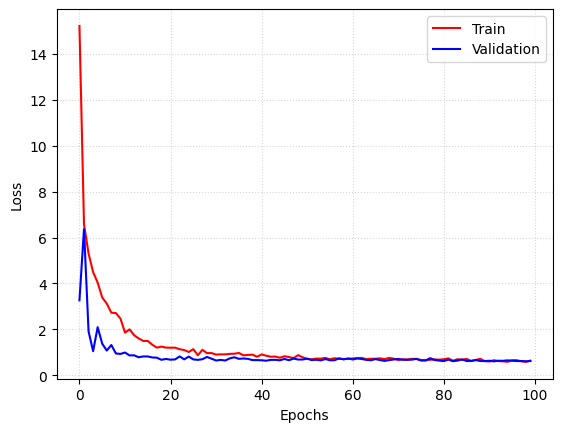

In [40]:
plt.plot(history.history['loss'], c = 'r', label = 'Train')
plt.plot(history.history['val_loss'], c = 'b', label = 'Validation')
plt.legend()
plt.grid(alpha = 0.5, linestyle = ':')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [50]:
## Sentimental analysis
samples = np.array(['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아'])
targets = np.array([[1], [0], [1], [1], [0], [1]])

display(samples)
print(targets)

array(['너 오늘 이뻐 보인다', '나는 오늘 기분이 더러워', '끝내주는데, 좋은 일이 있나봐', '나 좋은 일이 생겼어',
       '아 오늘 진짜 짜증나', '환상적인데, 정말 좋은거 같아'], dtype='<U16')

[[1]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [ ]:
samples = np.array(['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아'])

In [51]:
## Tokening
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)

print(tokenizer.word_counts)
print(tokenizer.word_index)

OrderedDict([('너', 1), ('오늘', 3), ('이뻐', 1), ('보인다', 1), ('나는', 1), ('기분이', 1), ('더러워', 1), ('끝내주는데', 1), ('좋은', 2), ('일이', 2), ('있나봐', 1), ('나', 1), ('생겼어', 1), ('아', 1), ('진짜', 1), ('짜증나', 1), ('환상적인데', 1), ('정말', 1), ('좋은거', 1), ('같아', 1)])
{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [54]:
samples = np.array(['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아'])

sequence = tokenizer.texts_to_sequences(samples)
display(sequence)

input_sequence = np.array(sequence)
targets = np.array([[1], [0], [1], [1], [0], [1]])

[[4, 1, 5, 6],
 [7, 1, 8, 9],
 [10, 2, 3, 11],
 [12, 2, 3, 13],
 [14, 1, 15, 16],
 [17, 18, 19, 20]]

In [83]:
## 감성분성
batch_size = 2
num_epochs = 200
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
emb_size = 128
hidden1 = 156
hidden2 = 1

# sentiment_model = keras.Sequential()
# sentiment_model.add(keras.Input(4, ))
# sentiment_model.add(keras.layers.Embedding(vocab_size, emb_size))
# sentiment_model.add(keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis = 1)))
# sentiment_model.add(keras.layers.Dense(hidden1, 'relu'))
# sentiment_model.add(keras.layers.Dense(hidden2, 'sigmoid'))
inputs = keras.Input(shape = (4, ))
embedding_layer = keras.layers.Embedding(vocab_size, emb_size)(inputs)
mean_emb = tf.reduce_mean(embedding_layer, axis = 1)
dense1 = keras.layers.Dense(hidden1, 'relu')(mean_emb)
outputs = keras.layers.Dense(hidden2, 'sigmoid')(dense1)
sentiment_model_fun = keras.Model(inputs = inputs, outputs = outputs)

# sentiment_model.summary()
sentiment_model_fun.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 4)]               0         
                                                                 
 embedding_9 (Embedding)     (None, 4, 128)            2688      
                                                                 
 tf.math.reduce_mean_1 (TFOp  (None, 128)              0         
 Lambda)                                                         
                                                                 
 dense_38 (Dense)            (None, 156)               20124     
                                                                 
 dense_39 (Dense)            (None, 1)                 157       
                                                                 


Total params: 22,969
Trainable params: 22,969
Non-trainable params: 0
_________________________________________________________________


In [78]:
learning_rate = 0.001
sentiment_model.compile(loss = 'binary_crossentropy',
                        optimizer=keras.optimizers.SGD(learning_rate),
                        metrics = ['acc'])
history = sentiment_model.fit(input_sequence, targets, epochs = num_epochs, batch_size = batch_size)

Epoch 1/200
3/3 [==============================] - 1s 2ms/step - loss: 0.6923 - acc: 0.5000
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6921 - acc: 0.5000
Epoch 3/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6919 - acc: 0.6667
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6917 - acc: 0.6667
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6914 - acc: 0.6667
Epoch 6/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6912 - acc: 0.6667
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6911 - acc: 0.6667
Epoch 8/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6908 - acc: 0.8333
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6906 - acc: 0.8333
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6904 - acc: 0.8333
Epoch 11/200
3/3 [==============================] - 0s 6ms/step - loss: 0.6901 

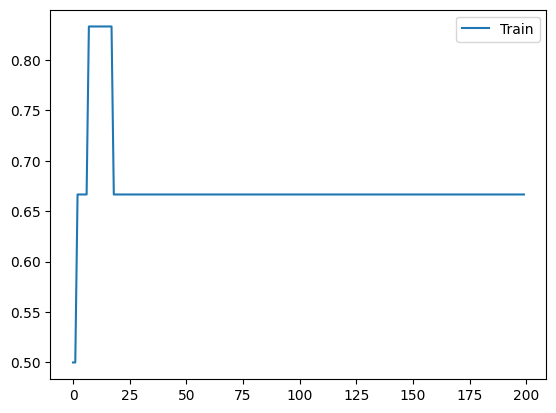

In [80]:
# plt.plot(history.history['val_acc'], label = 'Validation')
plt.plot(history.history['acc'], label = 'Train')
plt.legend()
plt.show()

In [84]:
class Sentiment_sub(keras.Model):
    def __init__(self, vocab_size, emb_size, hidden, outputs_node):
        super(Sentiment_sub, self).__init__()
        self.embedding = keras.layers.Embedding(vocab_size, emb_size)
        self.dense = keras.layers.Dense(hidden, 'relu')
        self.outputs = keras.layers.Dense(outputs_node, 'sigmoid')
        
    def call(self, inputs):
        x = self.embedding(x)
        x = tf.reduce_mean(x, axis = 1)
        x = self.dense(x)
        x = self.outputs(x)
        
        return x
    
sentiment_sub = Sentiment_sub(vocab_size, emb_size, 156, 1)
        

In [104]:
import sklearn
from sklearn import datasets
import pandas as pd

import inspect
print(sklearn.__version__)
print(inspect.getfile(datasets))

1.2.2
c:\Users\ETV\anaconda3\envs\py3.8\lib\site-packages\sklearn\datasets\__init__.py


In [101]:
iris_dataset = sklearn.datasets.load_iris()
type(iris_dataset)
iris_dataset.keys()
print(iris_dataset['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [100]:

print(iris_dataset['target'])
print(iris_dataset['target_names'])
print(iris_dataset['feature_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [107]:
print(type(iris_dataset['data']))

iris = pd.DataFrame(iris_dataset['data'])
iris['target'] = iris_dataset['target']
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris.head()

<class 'numpy.ndarray'>


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


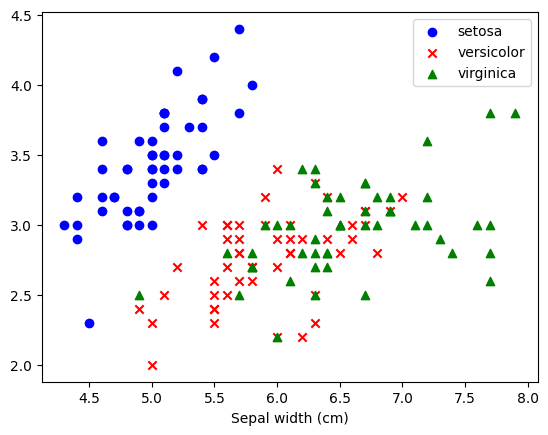

In [109]:
setosa = iris[iris['class'] == 0]
versicolor = iris[iris['class'] == 1]
virginica = iris[iris['class'] == 2]

# setosa.head()
plt.scatter(setosa['sepal_length'], setosa['sepal_width'], 
            marker = 'o', color = 'b', label = 'setosa')
plt.scatter(versicolor['sepal_length'], versicolor['sepal_width'], 
            marker = 'x', color = 'r', label = 'versicolor')
plt.scatter(virginica['sepal_length'], virginica['sepal_width'], 
            marker = '^', color = 'g', label = 'virginica')

plt.legend()
plt.xlabel('Sepal length (cm)')
plt.xlabel('Sepal width (cm)')

plt.show()


In [110]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [118]:
train_input, test_input, train_target, test_target = train_test_split(
    iris_dataset['data'], iris_dataset['target'],
    test_size= 0.2
)

print(train_input.shape)
print(type(train_input), type(train_target))

(120, 4)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [119]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
knn = KNeighborsClassifier(n_neighbors=5)

In [121]:
params_knn = {'n_neighbors': range(1, 10)}
gs_knn = GridSearchCV(estimator=knn,
                      param_grid=params_knn,
                      scoring='accuracy', cv = 5, verbose=1)
gs_knn.fit(train_scaled, train_target)

print(gs_knn.best_params_)
print(gs_knn.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 6}
0.9666666666666666
